# Student Performance vs Funding

#### Data sources: https://www.kaggle.com/noriuk/us-educational-finances?select=states.csv

### Import Dependencies and Setup for the analyze

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import warnings

# Study data files paths
average_scores_path = "Input_Data/naep.csv"
fed_revenue_path = "Input_Data/states.csv"

# Read the score data and the revenue results
scores_data = pd.read_csv(average_scores_path)
revenue_data = pd.read_csv(fed_revenue_path)

In [2]:
# Combine the data into a single dataset
merged_data_df = pd.merge(scores_data, revenue_data, how = "inner", \
                          left_on=['STATE','YEAR'], right_on=['STATE', 'YEAR'])

# Convert to numeric
merged_data_df['AVG_SCORE'] = merged_data_df['AVG_SCORE'].apply(pd.to_numeric, errors='coerce' )
merged_data_df['TOTAL_REVENUE'] = merged_data_df['TOTAL_REVENUE'].apply(pd.to_numeric, errors='coerce' )
merged_data_df['INSTRUCTION_EXPENDITURE'] = merged_data_df['INSTRUCTION_EXPENDITURE'].apply(pd.to_numeric, errors='coerce' )

merged_data_df = merged_data_df.drop(columns=['FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', \
                                              'TOTAL_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE', \
                                              'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE'])

merged_data_df = merged_data_df.dropna()

# Display the data table for preview
merged_data_df

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610
...,...,...,...,...,...,...,...,...
2035,1994,Virginia,213.457286,Reading,4,1044721.0,6125739,3271356
2036,1994,Washington,212.695386,Reading,4,915952.0,5739012,2918426
2037,1994,West Virginia,213.146935,Reading,4,313750.0,1854403,1051169
2038,1994,Wisconsin,224.174545,Reading,4,843747.0,5682439,3257526


In [3]:
# Calculate the Total revenue per Student
# Note: The total revenue is the same regardless the grade or subject

revenue_per_student = round((merged_data_df["TOTAL_REVENUE"]*1000)/merged_data_df["ENROLL"],2)
# revenue_per_student.head()

merged_data_df["TOTAL_REV_PER_STUDENT"] = revenue_per_student


In [4]:
# Calculate the Instruction spending per Student for 2015
# Note: The instruction expenditure is the same regardless the grade or subject

spending_per_student = round((merged_data_df["INSTRUCTION_EXPENDITURE"]*1000)/merged_data_df["ENROLL"],2)
# spending_per_student.head()

merged_data_df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = spending_per_student


In [5]:
# Group merged data by the test subject
test_subject = merged_data_df.groupby(['TEST_SUBJECT'])
test_subject.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,TOTAL_REV_PER_STUDENT,INSTRUCTION_EXPENDITURE_PER_STUDENT
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479,10014.26,5194.03
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479,10014.26,5194.03
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479,10014.26,5194.03
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479,10014.26,5194.03
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610,22339.38,11354.14
5,2015,Alaska,280.493456,Mathematics,8,130755.0,2920986,1484610,22339.38,11354.14
6,2015,Alaska,212.792600,Reading,4,130755.0,2920986,1484610,22339.38,11354.14
7,2015,Alaska,260.317019,Reading,8,130755.0,2920986,1484610,22339.38,11354.14
8,2015,Arizona,237.611755,Mathematics,4,944978.0,8230507,3846357,8709.73,4070.31
10,2015,Arizona,215.311337,Reading,4,944978.0,8230507,3846357,8709.73,4070.31


### Reveune and Spending analysis

In [6]:
# 2015 dataframe
year_2015 = merged_data_df[(merged_data_df['YEAR'] == 2015)]

year_2015.head()

,YEAR,STATE,AVG_SCORE,TEST_SUBJECT,TEST_YEAR,ENROLL,TOTAL_REVENUE,INSTRUCTION_EXPENDITURE,TOTAL_REV_PER_STUDENT,INSTRUCTION_EXPENDITURE_PER_STUDENT
0,2015,Alabama,230.977423,Mathematics,4,734974.0,7360222,3817479,10014.26,5194.03
1,2015,Alabama,266.555318,Mathematics,8,734974.0,7360222,3817479,10014.26,5194.03
2,2015,Alabama,217.049090,Reading,4,734974.0,7360222,3817479,10014.26,5194.03
3,2015,Alabama,258.753761,Reading,8,734974.0,7360222,3817479,10014.26,5194.03
4,2015,Alaska,236.328417,Mathematics,4,130755.0,2920986,1484610,22339.38,11354.14


In [7]:
# Statistics for 2015 total revenue
total_rev = year_2015["TOTAL_REVENUE"].agg(['mean', 'median', 'var', 'std', 'sem'])
total_rev

mean      1.281705e+07
median    7.548871e+06
var       2.436156e+14
std       1.560819e+07
sem       1.092792e+06
Name: TOTAL_REVENUE, dtype: float64

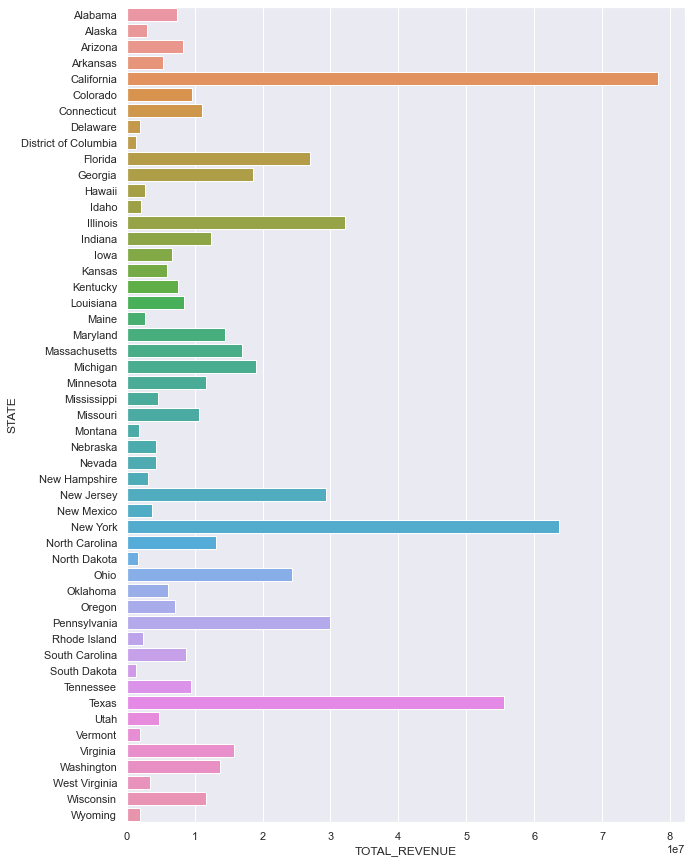

In [8]:
# Total revenue by State in 2015, presenting in barplot

sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (10, 15))
 
sns.barplot(x = "TOTAL_REVENUE", y = "STATE", data = year_2015, ax = ax)
ax.set(xlabel = "TOTAL_REVENUE") 

plt.savefig("Output_images/Total_Rev_by_State.png")

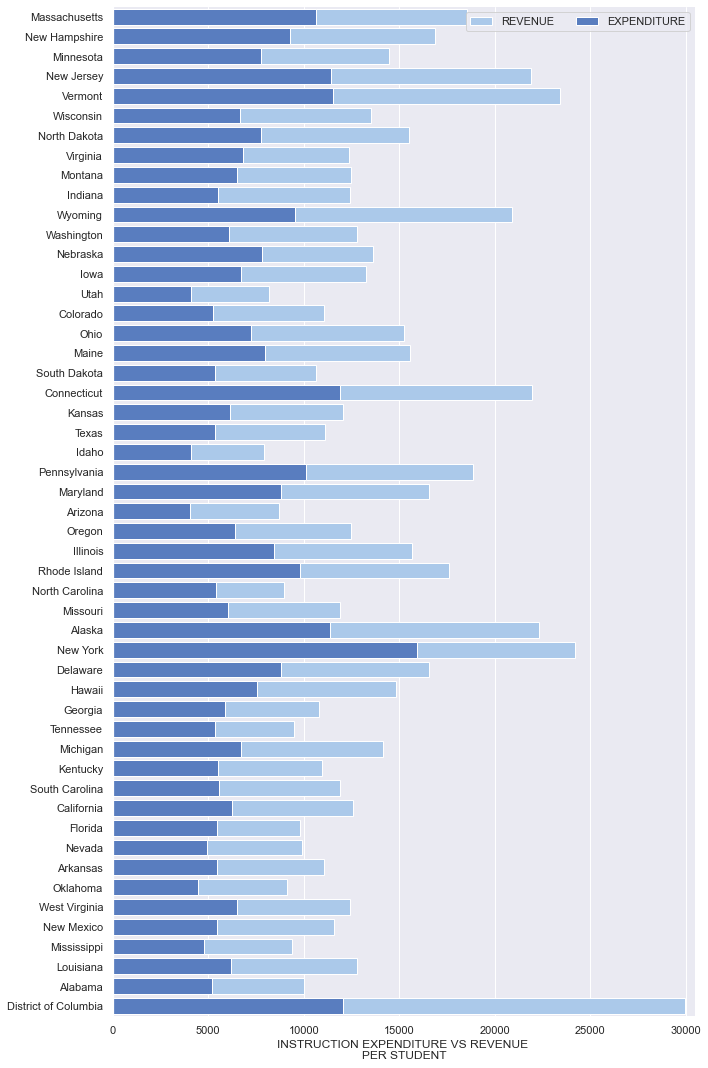

In [9]:
# Total revenue vs Instruction expenditure per student, sorted by Avg score

avg_score_sort = year_2015.sort_values("AVG_SCORE", ascending = False)

f, ax = plt.subplots(figsize = (10, 15))

sns.set_color_codes("pastel")
ax = sns.barplot(x = "TOTAL_REV_PER_STUDENT", y = "STATE", 
                 label = "REVENUE", data = avg_score_sort, color = "b", ax = ax)


sns.set_color_codes("muted")
ax = sns.barplot(x = "INSTRUCTION_EXPENDITURE_PER_STUDENT", y = "STATE", 
                 label = "EXPENDITURE", data = avg_score_sort, color = "b", ax = ax)

handles, labels = ax.get_legend_handles_labels()

ax.legend(ncol = 2, loc = "upper right", frameon = True)
ax.set(xlim = (0, 30500), ylabel = "",
       xlabel = "INSTRUCTION EXPENDITURE VS REVENUE \nPER STUDENT")

sns.despine(bottom = True)
plt.tight_layout(h_pad = 1)

plt.savefig("Output_images/Rev_Exp_Per_Student.png")

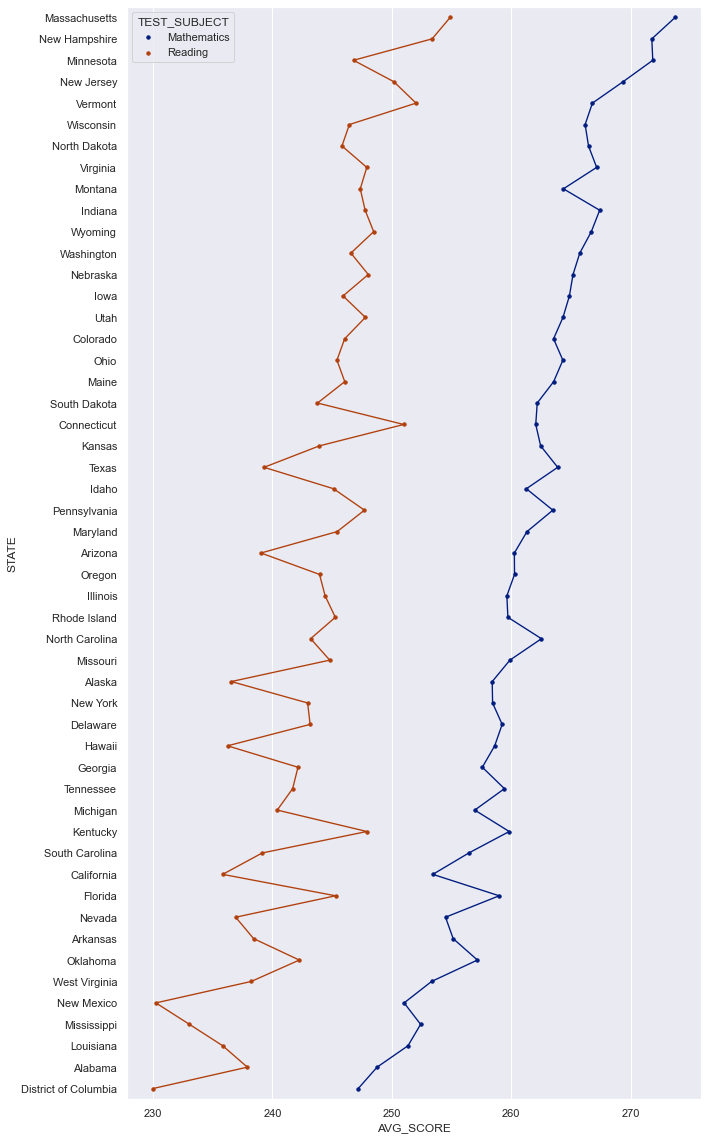

In [10]:
# Barplot to show the Avg scores in each State in 2015, sorted by Avg score
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize=(10, 16))
              
sns.pointplot(x = "AVG_SCORE", y = "STATE", data = avg_score_sort, hue = "TEST_SUBJECT", 
              palette = "dark", markers = "o", scale=.5, ci = None)

ax.set(xlabel = "AVG_SCORE")
plt.tight_layout()

plt.savefig("Output_images/AVG_Score.png")

In [ ]:
# Combined the two plots from above
# Total revenue vs Instruction Expenditures per student, sorted by Avg score

avg_score_sort = year_2015.sort_values("AVG_SCORE", ascending = False)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (22, 18), sharey = True)

sns.set_color_codes("pastel")
ax = sns.barplot(x = "TOTAL_REV_PER_STUDENT", y = "STATE", 
                 label = "REVENUE", data = avg_score_sort, color = "b", ax = ax1)


sns.set_color_codes("muted")
ax = sns.barplot(x = "INSTRUCTION_EXPENDITURE_PER_STUDENT", y = "STATE", 
                 label = "EXPENDITURE", data = avg_score_sort, color = "b", ax = ax1)

handles, labels = ax.get_legend_handles_labels()

ax.legend(ncol = 2, loc = "upper right", frameon = True)
ax.set(xlim = (0, 31000), ylabel = "",
       xlabel = "INSTRUCTION EXPENDITURE VS REVENUE \nPER STUDENT")

sns.pointplot(x = "AVG_SCORE", y = "STATE", data = avg_score_sort, hue = "TEST_SUBJECT", 
              palette = "dark", markers = "o", scale = .8, ci = None, ax = ax2)

ax.set(xlabel = "AVG_SCORE")


sns.despine(bottom = True)
plt.tight_layout(h_pad = 1)

plt.savefig("Output_images/Rev_Exp_vs_Score.png")

#### Get the following dataframes:

* 2015 8th grade Math
* 2015 8th grade Reading

In [ ]:
# For 2015 8th grade Math data

math = year_2015[year_2015["TEST_SUBJECT"] == 'Mathematics']

grade_8_math = math[math["TEST_YEAR"] == 8]

grade_8_math.head()

In [ ]:
# For 2015 8th grade Reading data

reading = year_2015[year_2015["TEST_SUBJECT"] == 'Reading']

grade_8_reading = reading[reading["TEST_YEAR"] == 8]

grade_8_reading.head()

### Total funding received per student vs average scores

In [ ]:
# Total revenue vs 8th grade Reading scores
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

sns.scatterplot(x = "TOTAL_REV_PER_STUDENT", y = "AVG_SCORE",
                sizes = (1, 8), data = grade_8_reading, ax = ax)

plt.tight_layout()
plt.savefig("Output_images/Total_Rev_8th_Reading.png")

In [ ]:
# Total revenue vs 8th grade Math scores
sns.set_theme(color_codes = True)

f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

sns.scatterplot(x = "TOTAL_REV_PER_STUDENT", y = "AVG_SCORE",
                sizes = (1, 8), data = grade_8_math, ax = ax)

plt.tight_layout()
plt.savefig("Output_images/Total_Rev_8th_Math.png")

### Spending vs scores

In [ ]:
# Linear regression for 8th grade Reading vs Spending per Student
sns.set_theme(color_codes = True)
f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

slope, intercept, r_value, p_value, std_err = st.linregress(grade_8_reading["INSTRUCTION_EXPENDITURE_PER_STUDENT"],\
                                                               grade_8_reading["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (12000, 265), fontsize = 15, color = 'blue', fontweight = "bold")
ax.set(xlim = (3800, 16200))

sns.regplot(data = grade_8_reading, x = "INSTRUCTION_EXPENDITURE_PER_STUDENT", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

print(f"The r-value is {r_value}")
print(f"The p-value is {p_value}")

plt.tight_layout()
plt.savefig("Output_images/Reg_Total_Exp_8th_Read.png")

In [ ]:
# Linear regression for 8th grade Math vs Spending per Student
sns.set_theme(color_codes = True)
f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

slope, intercept, r_value, p_value, std_err = st.linregress(grade_8_math["INSTRUCTION_EXPENDITURE_PER_STUDENT"],\
                                                               grade_8_math["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (11000, 282), fontsize = 15, color = 'blue', fontweight = "bold")
ax.set(xlim = (3800, 16200))

sns.regplot(data = grade_8_math, x = "INSTRUCTION_EXPENDITURE_PER_STUDENT", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

print(f"The r-value is {r_value}")
print(f"The p-value is {p_value}")

plt.tight_layout()
plt.savefig("Output_images/Reg_Total_Exp_8th_Math.png")

### All year

In [ ]:
# All year 8th grade Math 
all_year_math = merged_data_df.loc[(merged_data_df['TEST_SUBJECT'] == 'Mathematics') & (merged_data_df['TEST_YEAR'] == 8)]

# All year 8th grade Reading
all_year_reading = merged_data_df.loc[(merged_data_df['TEST_SUBJECT'] == 'Reading') & (merged_data_df['TEST_YEAR'] == 8)]


In [ ]:
# Calculate the Instruction spending per Student for all years
# Note: The instruction expenditure is the same regardless the grade or subject

spending_per_student_all = round((all_year_math["INSTRUCTION_EXPENDITURE"]*1000)/all_year_math["ENROLL"],2)
# spending_per_student.head()

all_year_math["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = spending_per_student_all


In [ ]:
# Calculate the Instruction spending per Student for all years
# Note: The instruction expenditure is the same regardless the grade or subject

spending_per_student_all = round((all_year_reading["INSTRUCTION_EXPENDITURE"]*1000)/all_year_reading["ENROLL"],2)
# spending_per_student.head()

all_year_reading["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = spending_per_student_all

In [ ]:
# Linear regression for 8th grade Math vs Spending per Student across the years
sns.set_theme(color_codes = True)
f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

slope, intercept, r_value, p_value, std_err = st.linregress(all_year_math["INSTRUCTION_EXPENDITURE_PER_STUDENT"],\
                                                               all_year_math["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (11000, 282), fontsize = 18, color = 'blue', fontweight = "bold")
ax.set(xlim = (2000, 16200))

sns.regplot(data = all_year_math, x = "INSTRUCTION_EXPENDITURE_PER_STUDENT", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

print(f"The r-value is {r_value}")
print(f"The p-value is {p_value}")

plt.tight_layout()
plt.savefig("Output_images/Reg_Total_Exp_8th_Math_all.png")

In [ ]:
# Linear regression for 8th grade Reading vs Spending per Student across the years
sns.set_theme(color_codes = True)
f, ax = plt.subplots(figsize = (8,8))
sns.despine(f, left = False, bottom = False)

slope, intercept, r_value, p_value, std_err = st.linregress(all_year_reading["INSTRUCTION_EXPENDITURE_PER_STUDENT"],\
                                                               all_year_reading["AVG_SCORE"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (11000, 282), fontsize = 18, color = 'blue', fontweight = "bold")
ax.set(xlim = (2000, 16200))

sns.regplot(data = all_year_reading, x = "INSTRUCTION_EXPENDITURE_PER_STUDENT", y = "AVG_SCORE", \
               line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

print(f"The r-value is {r_value}")
print(f"The p-value is {p_value}")

plt.tight_layout()
plt.savefig("Output_images/Reg_Total_Exp_8th_Read_all.png")

### Data Output

In [ ]:
# output file (csv)
grade_8_math.to_csv("Output_Data/clean_math_8.csv", index = False, header = True)
grade_8_reading.to_csv("Output_Data/clean_reading_8.csv", index = False, header = True)
